# Introduction to keras

<img src="https://keras.io/img/logo.png" width=300>

- Author: geoffroy.peeters@telecom-paris.fr
- Date: 2022/05/30

Keras is an open-source software library that provides a Python interface for artificial neural networks. 
Keras acts as an interface for the TensorFlow library.
Up until version 2.3, Keras supported multiple backends, including TensorFlow and Theano. 
As of version 2.4, only TensorFlow is supported. 
Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible. 
Its primary author and maintainer is François Chollet from the ENSTA Paris school, now a Google engineer.

**See also:**
- man documentation on https://keras.io/
- [keras cheet sheat](https://res.cloudinary.com/dyd911kmh/image/upload/v1653829364/Marketing/Blog/Keras_Cheat_Sheet.pdf)

Recommended book: "Deep Learning with Python" by François Chollet

<img src="https://images-eu.ssl-images-amazon.com/images/I/71PRvtkPAZL._AC_UL232_SR232,232_.jpg" width=200>




# Typical Keras Dataflow


<img src="https://docs.google.com/uc?export=download&id=1LBIcg-PV62PlBDS77zwGZVxJaCSfSXW_" width=300>


# Keras import

In [ ]:
from tensorflow import keras
print(keras.__version__)

2.8.0


Check GPU accessibility

In [ ]:
!nvidia-smi

Wed Jun 15 06:49:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Exemple 1: Dummy data classification

## Data loading

For this first application, we will create some dummy data (i.e. artifical data just created to test machine learning models).

In [ ]:
from sklearn import datasets
data, labels = datasets.make_classification(n_samples=1000, 
                                            n_features=5, 
                                            n_informative=5, 
                                            n_redundant=0, 
                                            n_classes=3, 
                                            n_clusters_per_class=1, 
                                            class_sep=1.5) 

We can display the first two dimensions of the data with the associated labels represented as colors.

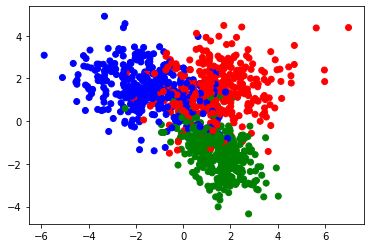

In [ ]:
import matplotlib.pyplot as plt
color_l = ['red', 'blue', 'green', 'pink', 'yellow']
colors = [color_l[label] for label in labels]
plt.scatter(data[:,0], data[:,1], color=colors);

## Data preparation

As for all machine-learning models, we split the data into a training part and a test part.

In [ ]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(data, labels, test_size = 0.1)

print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')


x_train: (900, 5)
x_test: (100, 5)


We deal with a multi-class classification problem. The output of our network will therefore have $C$ different neurons. We need to map the ground-truth classes to the same format.

In [ ]:
from tensorflow.keras.utils import to_categorical 

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print(f'y_train_oh: {y_train_oh.shape}')
print(f'y_test_oh: {y_test_oh.shape}')

y_train_oh: (900, 3)
y_test_oh: (100, 3)


## Model definition

We now create the flow-chart/ architecture of our Deep-Neural-Network.

<img src="https://docs.google.com/uc?export=download&id=1TJBr-trS67gx7oHbpO77tV2F35Vm9D77" width=300>

We can do this using the **Sequential API**.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

n_in = 5
n_h = 32
n_out = 3

model = Sequential()
model.add(Dense(n_h, input_dim=n_in))
model.add(Activation('ReLU'))
model.add(Dropout(rate = 0.5))
model.add(Dense(n_out))
model.add(Activation('softmax'))

In [ ]:
model = Sequential([
                    Dense(n_h, input_dim=n_in), 
                    Activation('ReLU'),
                    Dropout(rate = 0.5),
                    Dense(3), 
                    Activation('softmax'),
                    ])

We can do the same using the **Functional API**.

In [ ]:
from tensorflow.keras.models import Model

X = keras.Input(shape=(x_train.shape[1],))
Z = Dense(n_h)(X)
Z = Activation('ReLU')(Z)
Z = Dropout(rate = 0.5)(Z)
Z = Dense(3)(Z)
Y = Activation('softmax')(Z)
model = Model(inputs=X, outputs=Y)

We can display a summary of the flow-chart/ architecture of our Deep-Neural-Network.

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_2 (Dense)             (None, 32)                192       
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
 activation_3 (Activation)   (None, 3)                 0         
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params:

## Model compilation

To compile it, we need to define at least
- a loss to be minimized during training 
- an optimizer, which indicates how the loss will be minimized (example: using the simple Steepest Gradient Descent --- SGD ---)

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.01, decay=10e-6)
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='acc')

## Model fitting (training)

To train (.fit) the model, we need to define training-data (x and y), optional validation-data, the number of epochs, the size of a mini-batch and opional callback (such as Early-Stopping)

<img src="https://docs.google.com/uc?export=download&id=1LFbfyj43FJIzrq_QC11qoBB9xOXNQ4yz" width=300>


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x=x_train, y=y_train_oh, 
                    validation_data=(x_test, y_test_oh), 
                    epochs=100, 
                    batch_size=32, 
                    shuffle=True,
                    callbacks=[early_stopping],
                    verbose=0)

The output variable ``history`` contains the values of the loss over epochs. We can display it to check that the training was good.

Text(0.5, 1.0, 'Accuracy')

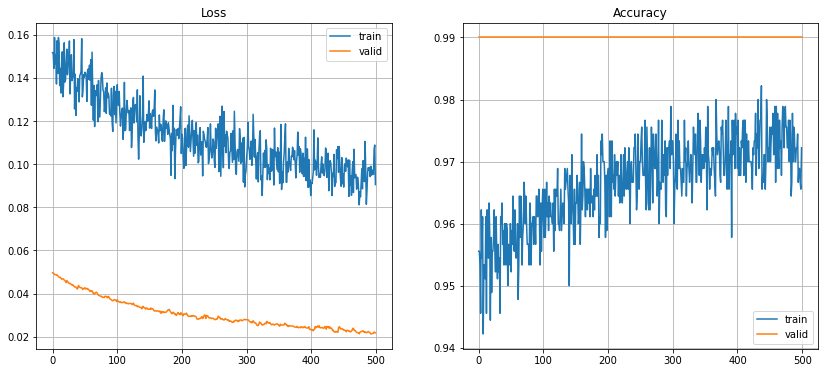

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train');
plt.plot(history.history['val_loss'], label='valid');
plt.grid(True);
plt.legend();
plt.title('Loss')


plt.subplot(1,2,2)
plt.plot(history.history['acc'], label='train');
plt.plot(history.history['val_acc'], label='valid');
plt.grid(True);
plt.legend();
plt.title('Accuracy')

## Model testing

In [ ]:
from sklearn.metrics import confusion_matrix

hat_y_test_oh = model.predict(x_test)

matrix = confusion_matrix(y_test_oh.argmax(axis=1), hat_y_test_oh.argmax(axis=1))
print (matrix)

[[29  0  0]
 [ 0 37  1]
 [ 0  0 33]]


In [ ]:
score = model.evaluate( y_test_oh, hat_y_test_oh )

print(score)

ValueError: ignored

## Save the trained model

In [ ]:
model.save('trained_model.h5')
model.save_weights('my_model_weights.h5')
del(model)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('trained_model.h5')
model.load_weights('my_model_weights.h5', by_name=True)

In [ ]:
model.layers[0].__dict__

{'_activity_regularizer': None,
 '_auto_track_sub_layers': True,
 '_autocast': True,
 '_batch_input_shape': (None, 5),
 '_build_input_shape': TensorShape([None, 5]),
 '_callable_losses': [],
 '_compute_dtype_object': tf.float32,
 '_default_training_arg': None,
 '_dtype_policy': <Policy "float32">,
 '_dynamic': False,
 '_expects_mask_arg': False,
 '_expects_training_arg': False,
 '_inbound_nodes_value': [<keras.engine.node.Node at 0x7f0e44641cd0>],
 '_initial_weights': None,
 '_input_spec': InputSpec(min_ndim=2, axes={-1: 5}),
 '_instrumented_keras_api': True,
 '_instrumented_keras_layer_class': True,
 '_instrumented_keras_model_class': False,
 '_losses': [],
 '_metrics': [],
 '_metrics_lock': <unlocked _thread.lock object at 0x7f0e4a91c3c0>,
 '_name': 'dense_12',
 '_non_trainable_weights': [],
 '_obj_reference_counts_dict': ObjectIdentityDictionary({<_ObjectIdentityWrapper wrapping 32>: 1, <_ObjectIdentityWrapper wrapping <function linear at 0x7f0e5020b7a0>>: 1, <_ObjectIdentityWrapper

# Exemple 2: Image classification

## Data loading

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


## Data preparation

In [ ]:
import numpy as np
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1), order='C')
x_train = x_train.astype('float32')
x_train /= 255

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1), order='C')
x_test = x_test.astype('float32')
x_test /= 255


In the case of ConvNet, the shape of the input data is (m, h, w) where m is the number of examples,n h and w the height and width of the image. 

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print(y_train[:3])
print(y_train_oh[:3])

[5 0 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Model definition

<img src="https://docs.google.com/uc?export=download&id=1vm6lxmUnk1jlTSxvKqc6fpvkKKvxXt0g" width=700>


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

n_h1 = 6
n_h2 = 6
n_out = 10

m, w, h, c = x_train.shape
model = Sequential() 
model.add(Conv2D(filters=n_h1, kernel_size=(5,5), input_shape=(w,h,c), padding='valid', data_format='channels_last'))
model.add(Activation('ReLU')) 
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=n_h2, kernel_size=(5,5), padding='valid'))
model.add(Activation('ReLU')) 
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(n_out))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 activation (Activation)     (None, 24, 24, 6)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 6)           906       
                                                                 
 activation_1 (Activation)   (None, 8, 8, 6)           0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 6)          0         
 2D)                                                    

## Model compilation

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='acc')


## Model fitting (training)

In [ ]:
history = model.fit(x=x_train, y=y_train_oh, 
                    validation_data=(x_test, y_test_oh), 
                    epochs=100, 
                    batch_size=32, 
                    shuffle=True,
                    verbose=2)

Epoch 1/100
1875/1875 - 17s - loss: 0.1774 - acc: 0.9446 - val_loss: 0.0900 - val_acc: 0.9722 - 17s/epoch - 9ms/step
Epoch 2/100
1875/1875 - 5s - loss: 0.1060 - acc: 0.9690 - val_loss: 0.0889 - val_acc: 0.9735 - 5s/epoch - 2ms/step
Epoch 3/100
1875/1875 - 5s - loss: 0.0994 - acc: 0.9708 - val_loss: 0.0866 - val_acc: 0.9771 - 5s/epoch - 3ms/step
Epoch 4/100
1875/1875 - 5s - loss: 0.0942 - acc: 0.9725 - val_loss: 0.0832 - val_acc: 0.9788 - 5s/epoch - 2ms/step
Epoch 5/100
1875/1875 - 5s - loss: 0.0926 - acc: 0.9740 - val_loss: 0.1014 - val_acc: 0.9694 - 5s/epoch - 3ms/step
Epoch 6/100
1875/1875 - 5s - loss: 0.0914 - acc: 0.9734 - val_loss: 0.0946 - val_acc: 0.9734 - 5s/epoch - 2ms/step
Epoch 7/100
1875/1875 - 5s - loss: 0.0904 - acc: 0.9743 - val_loss: 0.0862 - val_acc: 0.9749 - 5s/epoch - 3ms/step
Epoch 8/100
1875/1875 - 5s - loss: 0.0879 - acc: 0.9746 - val_loss: 0.0865 - val_acc: 0.9751 - 5s/epoch - 3ms/step
Epoch 9/100


KeyboardInterrupt: ignored

# Exemple 3: Auto-Encoder

## Data loading

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Data preparation

In [ ]:
import numpy as np
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

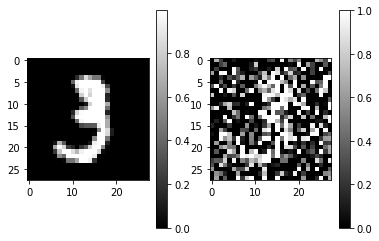

In [ ]:
noise_factor = 0.8
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

idx = 10
plt.subplot(1,2,1); plt.imshow(x_train[idx].reshape(28,28)); plt.colorbar();
plt.subplot(1,2,2); plt.imshow(x_train_noisy[idx].reshape(28,28)); plt.colorbar();

## Model definition



In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='ReLU', padding='same')(input_img)
x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same')(x)

x = layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='ReLU', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same')(x)

x = layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='ReLU', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same')(x)

# --- dimension of encoded is (4, 4, 8), i.e. 128-dimensional
encoded = x

x = layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='ReLU', padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)

x = layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='ReLU', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)

x = layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='ReLU', padding='valid')(x)
x = layers.UpSampling2D((2,2))(x)

x = layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), activation='sigmoid', padding='same')(x)
decoded = x

model_autoencoder = keras.Model(input_img, decoded)
model_autoencoder.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_85 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 7, 7, 8)           584

## Model compilation

In [ ]:
model_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

## Model fitting (training)

In [ ]:
model_autoencoder.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test), epochs=10, batch_size=128, shuffle=True)

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.2767 - val_loss: 0.2142
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2051 - val_loss: 0.1950
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1917 - val_loss: 0.1863
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1848 - val_loss: 0.1805
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1803 - val_loss: 0.1772
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1770 - val_loss: 0.1746
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1747 - val_loss: 0.1721
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1727 - val_loss: 0.1706
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1711 - val_loss: 0.1696
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1697 - val_loss: 0.1682

## Model testing

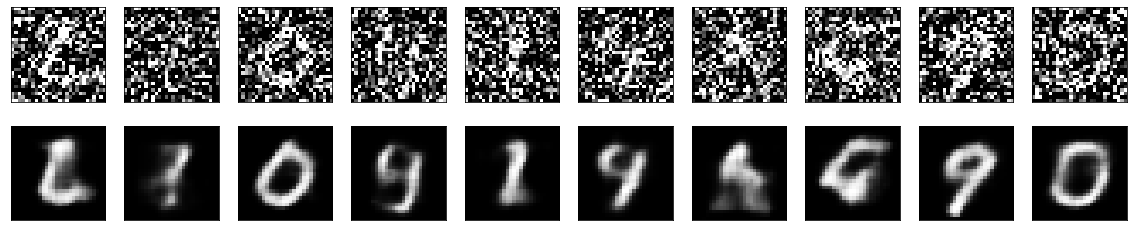

In [ ]:
import matplotlib.pyplot as plt

decoded_imgs = model_autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20,4))
for i in range(1, n+1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Exemple 4: Recurrent Neural Networks

In [ ]:
from tensorflow.keras.datasets import imdb
top_words = 10000
INDEX_FROM = 3
np.load.__defaults__=(None, True, True, 'ASCII')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words, index_from=INDEX_FROM)
np.load.__defaults__=(None, False, True, 'ASCII')


17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print( X_train.shape )
print( X_train[0] )

(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
import numpy as np
from tensorflow.keras.layers import SimpleRNN
inputs = np.random.random([32, 10, 8]).astype(np.float32)

In [ ]:
simple_rnn = SimpleRNN(4)
output = simple_rnn(inputs)
print( inputs.shape )
print( output.shape )

(32, 10, 8)
(32, 4)


In [ ]:
simple_rnn = SimpleRNN(4, return_sequences=True)
output = simple_rnn(inputs)
print( inputs.shape )
print( output.shape )

(32, 10, 8)
(32, 10, 4)


In [ ]:
simple_rnn = SimpleRNN(4, return_sequences=True, return_state=True)
output = simple_rnn(inputs)
print( inputs.shape )
print( output[0].shape )
print( output[1].shape )

(32, 10, 8)
(32, 10, 4)
(32, 4)


# Advanced: Fit generator

https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly